## BB8 as a control problem


In [46]:
from numpy import *
from math import tau
from matplotlib.pyplot import *
from ipywidgets import interact
from scipy.integrate import odeint # This is the numerical solver


## Here's a video of the BB-8 from StarWars

In [45]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/A_K10fX9DSY?start=30" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Let's draw

We want to draw a 2D version, a circle on top of a big circle.

Let's practice our drawing, then animate with widgets, then use this to figure out the rolling constraints of the little ball on the big ball.

Then when we solve the ODEs for the ball, we should get something interesting that we can hook into the animation immediately.

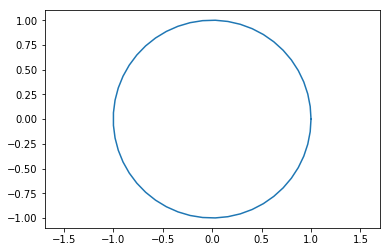

In [7]:
circle_x = cos(linspace(0,tau))
circle_y = sin(linspace(0,tau))
plot(circle_x,circle_y)
axis('equal');

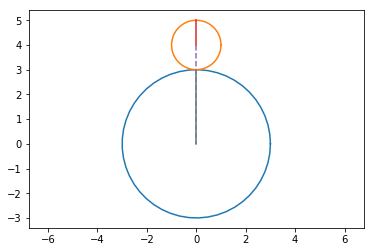

In [14]:
t1 = 0 # angle of big circle B
t2 = 0 # angle of small circle S
t3 = 0 # angle to position small circle
R = 3 # radius of big circle
r = 1 # radius of small circle

Bcirc_x = R*circle_x
Bcirc_y = R*circle_y

Scirc_x = r*circle_x - (R+r)*sin(t3)
Scirc_y = r*circle_y + (R+r)*cos(t3)

Bline_x = [0,-R*sin(t1)]
Bline_y = [0, R*cos(t1)]

Sline_x = [-(R+r)*sin(t3),-(R+r)*sin(t3)-r*sin(t2)]
Sline_y = [ (R+r)*cos(t3), (R+r)*cos(t3)+r*cos(t2)]

Dline_x = [-(R+r)*sin(t3),0]
Dline_y = [ (R+r)*cos(t3),0]

plot(Bcirc_x,Bcirc_y,Scirc_x,Scirc_y)
axis('equal');
plot(Bline_x,Bline_y,Sline_x,Sline_y,Dline_x,Dline_y,'--');

In [28]:
def myDisplay(t1=0,t2=0,t3=0):
    Bcirc_x = R*circle_x
    Bcirc_y = R*circle_y
    Scirc_x = r*circle_x - (R+r)*sin(t3)
    Scirc_y = r*circle_y + (R+r)*cos(t3)
    Bline_x = [0,-R*sin(t1)]
    Bline_y = [0, R*cos(t1)]
    Sline_x = [-(R+r)*sin(t3),-(R+r)*sin(t3)-r*sin(t2)]
    Sline_y = [ (R+r)*cos(t3), (R+r)*cos(t3)+r*cos(t2)]
    Dline_x = [-(R+r)*sin(t3),0]
    Dline_y = [ (R+r)*cos(t3),0]
    fig = figure()
    ax = fig.add_subplot(111)
    ax.plot(Bcirc_x,Bcirc_y,Scirc_x,Scirc_y)
    ax.plot(Bline_x,Bline_y,Sline_x,Sline_y,Dline_x,Dline_y,'--'); 
    ax.axis([-R-2*r,R+2*r,-R-2*r,R+2*r])
    ax.axis('equal')
    ylim([-R-2*r,R+2*r])
    return

interact(myDisplay,t1=(0,tau),t2=(0,tau),t3=(0,tau));

interactive(children=(FloatSlider(value=3.141592653589793, description='t1', max=6.283185307179586), FloatSlid…

## Constraints on the angles

There is a constraint between the angles t1,t2,t3 if the circles roll against each other without slipping. 

The constraint says something about the distance the circles roll along the surface, which is a linear constraint then, so we can write
$$a t_1 + bt_2 + c t_3 = k.$$
However, if all the angles are zero, the constraint is satisfied (see picture, where we pointed all the directions upwards at angles zero), so the constant k in the equation is zero.
$$a t_1 + bt_2 + c t_3 = 0.$$

If the third angle t3 is held at zero, then the two circles rotate like gears, in opposite directions, with ratios given by the ratio of their radii, so we have 
$$ Rt_1 = -rt_2. (\mbox{ with $t_3 = 0$). }$$

If the first angle t1 is held at zero, then the small circle just rolls around the big circle. As t3 goes from 0 to 2pi, the small circle rotates a total of $R/r + 1$ times. (We pick up an extra rotation as the gear goes around in orbit.) So this tells us the linear equation in this case is
$$ (R+r)t_3 = rt_2. (\mbox{ with $t_1 = 0$). }$$

Put these together and we conclude the constraint is
$$Rt_1 + rt_2 = (R+r)t_3.$$

We can check this in our animation as follows:

In [43]:
def myDisplay2(t1=0,t2=0):
    t3 = (r*t2+R*t1)/(R+r)  ## the constraint on angles
    Bcirc_x = R*circle_x
    Bcirc_y = R*circle_y
    Scirc_x = r*circle_x - (R+r)*sin(t3)
    Scirc_y = r*circle_y + (R+r)*cos(t3)
    Bline_x = [0,-R*sin(t1)]
    Bline_y = [0, R*cos(t1)]
    Sline_x = [-(R+r)*sin(t3),-(R+r)*sin(t3)-r*sin(t2)]
    Sline_y = [ (R+r)*cos(t3), (R+r)*cos(t3)+r*cos(t2)]
    Dline_x = [-(R+r)*sin(t3),0]
    Dline_y = [ (R+r)*cos(t3),0]
    fig = figure()
    ax = fig.add_subplot(111)
    ax.plot(Bcirc_x,Bcirc_y,Scirc_x,Scirc_y)
    ax.plot(Bline_x,Bline_y,Sline_x,Sline_y,Dline_x,Dline_y,'--'); 
#    ax.axis([-R-2*r,R+2*r,-R-2*r,R+2*r])
    ax.axis('equal')
#    xlim([-R-2*r,R+2*r])
    ylim([-R-2*r,R+2*r])
    return

interact(myDisplay2,t1=(0,tau),t2=(0,tau));

interactive(children=(FloatSlider(value=0.0, description='t1', max=6.283185307179586), FloatSlider(value=0.0, …

## Finding the equations of motion

We could look at forces and try to figure out the equations of motion. For me, it is easier just to do Lagrangian mechanics. Just identify energy in the system, and build the system of ODEs.

## Set up the Lagrangian

#### Kinetic energy (due to rotational energy of the two disks, and linear energy of the little disc. 

We assume the big disk is rotating in place, so its mass does not appear -- no linear momentum. (We can change this assuption later, and have the big disk actually roll along the ground. ) So we just add the two rotational energies, and then the linear energy of the disk. Expressed in terms of the changing angles.


$$KE = \frac{1}{2}I_1 \dot\theta_1^2 + \frac{1}{2}I_2 \dot\theta_2^2 + \frac{1}{2}m_2(R+r) \dot\theta_3^2.$$ 

#### Potential energy (gravity on top mass)

$$ PE = m_2 g (R+r)\cos(\theta_3).$$

#### Lagrangian

$$ L = KE - PE $$

Equations of motion

$$\frac{d}{dt}\left( \frac{\partial L}{\partial \dot\theta_i} \right) - \frac{\partial L}{\partial \theta_i} = 0.$$



#### Constraint

$$R\theta_1 + r\theta_2 = (R+r)\theta_3.$$

So reduces the dimension of the problem.


## Reduced Lagrangian

#### Kinetic energy

$$KE = \frac{1}{2}I_1 \dot\theta_1^2 + \frac{1}{2}I_2 \dot\theta_2^2 + 
    \frac{m_2}{2(R+r)} (R\dot\theta_1 + r\dot\theta_2)^2.$$ 

#### Potential energy (gravity on top mass)

$$ PE = m_2 g (R+r)\cos(\frac{R\theta_1 + r\theta_1}{R+r}).$$

#### Lagrangian

$$ L = KE - PE $$

Equations of motion, for $i=1,2$:

$$\frac{d}{dt}\left( \frac{\partial L}{\partial \dot\theta_i} \right) - \frac{\partial L}{\partial \theta_i} = 0.$$

For $\theta_1$:

$$\frac{d}{dt}\left( I_1 \dot\theta_1 + \frac{m_2R}{R+r} (R\dot\theta_1 + r\dot\theta_2) \right)
+ m_2 g R \sin(\frac{R\theta_1 + r\theta_2}{R+r}) =0,$$
so
$$ I_1 \ddot\theta_1 + \frac{m_2R}{R+r} (R\ddot\theta_1 + r\ddot\theta_2) 
+ m_2 g R \sin(\frac{R\theta_1 + r\theta_2}{R+r}) =0.$$

For $\theta_2$:

$$\frac{d}{dt}\left( I_2 \dot\theta_2 + \frac{m_2r}{R+r} (R\dot\theta_1 + r\dot\theta_2) \right)
+ m_2 g r \sin(\frac{R\theta_1 + r\theta_2}{R+r}) =0,$$
so
$$ I_2 \ddot\theta_2 + \frac{m_2r}{R+r} (R\ddot\theta_1 + r\ddot\theta_2) 
+ m_2 g r \sin(\frac{R\theta_1 + r\theta_2}{R+r}) =0.$$



## Adding a control

These two equations have the units of a torque (Force times a distance). If we add a little motor that can apply a force of value $u = u(t)$ at the interface, we should get a torque of $ru$ on the small ball, and $Ru$ on the big ball. So our control equation will have the form:

$$ I_1 \ddot\theta_1 + \frac{m_2R}{R+r} (R\ddot\theta_1 + r\ddot\theta_2) 
+ m_2 g R \sin(\frac{R\theta_1 + r\theta_2}{R+r}) +Ru =0.$$

$$ I_2 \ddot\theta_2 + \frac{m_2r}{R+r} (R\ddot\theta_1 + r\ddot\theta_2) 
+ m_2 g r \sin(\frac{R\theta_1 + r\theta_2}{R+r}) - ru =0.$$

Should these torques have opposite signs? I think so. The first guess is that forces are equal and opposite (Newton's law). The second guess is, if we are smart enough to control the system so the $\theta_3 = constant$, then the middle term vanishes. In that case, the little ball is hanging off the side of the big ball, so both have to be accelerating in order to keep $\theta_3$ constant. However, they are accerating in opposite directions, since the circles act like gears, so they move in opposite directions. SO, I think this is right.

## Simplify the parameters

Let $k = R/(R+r)$ and $k' = r/(R+r)$. Divide the above equations by $m_2$, and $R,r$. We get

$$ \frac{I_1}{m_2R} \ddot\theta_1 + k\ddot\theta_1 + k'\ddot\theta_2 
+  g  \sin(k\theta_1 + k'\theta_2) +u/m_2 =0.$$

$$ \frac{I_2}{m_2 r} \ddot\theta_2 + k\ddot\theta_1 + k'\ddot\theta_2 
+ g  \sin(k\theta_1 + k'\theta_2) - u/m_2 =0.$$

Maybe this gets easier if we let $\phi_1 = k\theta_1, \phi_2 = k'\theta_2$ and $I'_1 = \frac{I_1}{m_2Rk}, I'_2 = \frac{I_2}{m_2rk'}.$ Rescale $u$ as well. We now have

$$ I_1' \ddot\phi_1 + \ddot\phi_1 + \ddot\phi_2 
+  g  \sin(\phi_1 + \phi_2) + u =0.$$

$$ I_2' \ddot\phi_2 + \ddot\phi_1 + \ddot\phi_2 
+ g  \sin(\phi_1 + \phi_2) - u =0.$$

This is a 2x2 linear system in unknowns $\ddot\phi_1, \ddot\phi_2$, so we solve as
$$\ddot\phi_1 = \frac{-I_2' [u+g\sin(\phi_1 + \phi_2)] - 2u}{I_1' + I_2' + I_1' I_2'},$$
$$\ddot\phi_2 = \frac{I_1' [u-g\sin(\phi_1 + \phi_2)] + 2u}{I_1' + I_2' + I_1' I_2'}.$$


## Sanity check

If $u=0$, then we see gravity will accelerate the first angle $\phi_1$ in one direction, and accelerate the other in the opposite direction (since the signs are opposite). So that makes sense, as these are gears.

If the $\sin$ is zero, then the action of the control is in opposite directions. Again, this makes sense as these circles act tike gears. So it seem we have the signs right.

## Non-dimensionalizing.

Looks like we can rescale time to get rid of the denominator and rescale the force $u$ to be relative to gravity $g$. So I think we are okay with a system like this (dropping primes):

$$\ddot\phi_1 = -I_2 [u+\sin(\phi_1 + \phi_2)] - 2u,$$
$$\ddot\phi_2 =  I_1 [u-\sin(\phi_1 + \phi_2)] + 2u.$$



## Notice we have no noise, no friction. We can worry about that later.

## The control strategy

How do we implement the control? 

Well, first we have to decide what we are aiming for. I like the idea of trying to get the big circle moving at a constant speed. For optimal control, we want to go from rest to that constant speed, in as short a time as possible.

The natural thing to do is to have the little circle hang off the edge of the big circle, as far as possible. That way gravity and the motor can work together to accelerate the big circle. 

However, we can't go too far off to the side of the big circle, or we might fall off. Or, we lose traction. So we have a natural limit for the direction angle $\theta_3$, limit it to, say plus or minus 30 degrees. 

Notice $\theta_3 = \phi_1 + \phi_2$ which is convenient. 

An interesting question is -- how do we get started? If we start at rest, with the little circle on top, then the sine term is zero. Should we accelerate to the left or to the right, to get where we want to go? Because the circles will go in opposite directions -- where do we end up?

I suspect this may have something to do with the relative sizes of those (rescaled) constants $I_1,I_2.$

## Getting started.

If we start at rest, we have $\phi_1 + \phi_2$ = 0, so we can linearize the sine function and get a linear syste,

$$\ddot\phi_1 = -I_2 [\phi_1 + \phi_2] - (2+ I_2)u,$$
$$\ddot\phi_2 =  I_1 [\phi_1 + \phi_2] + (2+I_1)u.$$

The eigenvalues for this system are 0 and $I_1-I_2$, the second one we expect is possible (the big circle has t alot of rotational inertia). So the system will have linear growth in the 0-eigendirection, and quadratic in the other direction. For small angles, the linear growth wins. 

So, to get started, we should accelerate to move the small circle **towards** the side where we want it to hang off the edge.

I think this is ready to implement with ODEint solver.


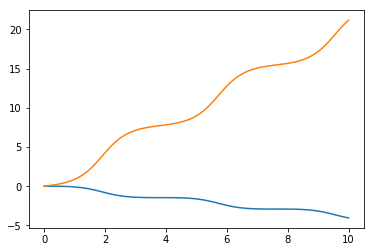

In [64]:
I1 = 4
I2 = 1

def rhs(Phis,t,omega):  # this is the function of the right hand side of the ODE
    phi1,phi1dot,phi2,phi2dot = Phis
    return phi1dot,-I2*sin(phi1+phi2),phi2dot,I1*sin(phi1+phi2)

t_arr=linspace(0,10,101)
Phis_init =[0,0,0,.5]
omega = 2.0
Phis_arr=odeint(rhs,Phis_init,t_arr, args=(omega,))
phi1,phi2 = Phis_arr[:,0],Phis_arr[:,2]
ion()
plot(t_arr,phi1,t_arr,phi2);

In [65]:
def myDisplay3(n=0):
    t1 = Phis_arr[n,0]*(R+r)/R  ## convert from phi's back to thetas!
    t2 = Phis_arr[n,2]*(R+r)/r
    t3 = (r*t2+R*t1)/(R+r)  ## the constraint on angles
    Bcirc_x = R*circle_x
    Bcirc_y = R*circle_y
    Scirc_x = r*circle_x - (R+r)*sin(t3)
    Scirc_y = r*circle_y + (R+r)*cos(t3)
    Bline_x = [0,-R*sin(t1)]
    Bline_y = [0, R*cos(t1)]
    Sline_x = [-(R+r)*sin(t3),-(R+r)*sin(t3)-r*sin(t2)]
    Sline_y = [ (R+r)*cos(t3), (R+r)*cos(t3)+r*cos(t2)]
    Dline_x = [-(R+r)*sin(t3),0]
    Dline_y = [ (R+r)*cos(t3),0]
    fig = figure()
    ax = fig.add_subplot(111)
    ax.plot(Bcirc_x,Bcirc_y,Scirc_x,Scirc_y)
    ax.plot(Bline_x,Bline_y,Sline_x,Sline_y,Dline_x,Dline_y,'--'); 
#    ax.axis([-R-2*r,R+2*r,-R-2*r,R+2*r])
    ax.axis('equal')
#    xlim([-R-2*r,R+2*r])
    ylim([-R-2*r,R+2*r])
    return

interact(myDisplay3,n=(0,100));

interactive(children=(IntSlider(value=0, description='n'), Output()), _dom_classes=('widget-interact',))

In [ ]:
play = widgets.Play(
#     interval=10,
    value=50,
    min=0,
    max=100,
    step=1,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])